# 다차원 첸서 (다차원 배열)

In [2]:
import numpy as np

### 다차원 배열의 계산 복습

In [3]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[7,8,9],[10,11,12]])

add_result = A + B

vec = np.array([1,2,3])
add_result2 = A + vec   # 브로드캐스팅: 두 개의 형태가 옹ㄴ전히 일치하지 않아도 알아서 요소를 확장해 각각의 요소에 대해 연산

print(add_result)
print(add_result2)

# dot_result = A.dot(B) # shape이 (2,3) (2,3)이라 내적이 안 됨 -> 첫째 행렬의 두번째, 둘째 행렬의 첫번째가 같아야함
dot_result = A.dot(B.T) # (2,3) (3,2) 
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


---

### 다차원 배열의 계산으로 순전파 구현

In [4]:
# 입력 데이터
X = np.random.randn(4,5)    # 4개의 샘플, 5차원 feature (5개의 특성을 가지고 있는 4개의 샘플 데이터를 만든 것)


# 가중치
W = np.random.randn(5,3)    # 가중치 만들기 # 5개의 입력(feature), 3개의 뉴런으로 구성된 레이어

# 편향
b = np.random.randn(1,3)

# 선형 계산 (W*X + b)
z = np.dot(X, W) + b

# ReLU 활성화 함수
result = np.maximum(0,z)

print(result)

[[0.         0.         0.        ]
 [1.29473347 0.         0.        ]
 [1.75080184 0.         0.        ]
 [0.         0.         1.91804694]]


---

### 다층 퍼셉트론

In [5]:
X = np.random.randn(6, 10)

# 은닉층 : 10개의 입력 -> 8개의 뉴런
w1 = np.random.randn(10, 8) 
b1 = np.random.randn(1, 8)

# 출력층 : 8개의 입력 -> 4개의 클래스
w2 = np.random.randn(8, 4) 
b2 = np.random.randn(1, 4)

# 은닉층 계산 (선형 계산 + tanh 활성화 함수)
z1 = np.dot(X, w1) + b1
result1 = np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성화 함수)
z2 = np.dot(result1, w2) + b2
exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
result2 = exp_z / np.sum(exp_z, axis=1, keepdims=True)

print(result2)

[[8.22855583e-02 6.94364730e-05 1.91306114e-02 8.98514394e-01]
 [7.52543594e-03 3.39098546e-04 3.60190846e-02 9.56116381e-01]
 [3.80009989e-02 2.11005973e-03 8.99076740e-04 9.58989865e-01]
 [8.36187891e-02 3.34086604e-04 8.90337895e-01 2.57092291e-02]
 [1.48987302e-02 9.68003635e-02 2.35527146e-01 6.52773760e-01]
 [3.37029812e-02 2.19633568e-03 6.72594994e-03 9.57374733e-01]]


---

### 이미지 데이터 예시

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

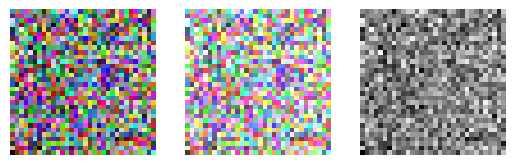

In [6]:
import matplotlib.pyplot as plt

# 이미지 생성
batch_size = 5
channels = 3
height = 32
width = 32

images = np.random.rand(batch_size, channels, height, width)

bright_images = np.clip(images + 0.2, 0, 1)

gray_images = np.mean(images, axis=1)

# PyTorch 프레임워크에서는 이미지 데이터를 (채널, 높이, 너비) 순서로 저장
# matplotlib.pyplot.imshow()는 (높이, 너비, 채널) 순서로 기대
# 따라서 transpose()를 이용해 축의 순서를 재배열
images_for_display = images[0].transpose(1, 2, 0)
bright_images_display = bright_images[0].transpose(1, 2, 0)

plt.subplot(1, 3, 1)
plt.imshow(images_for_display)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bright_images_display)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_images[0], cmap='gray')
plt.axis('off')